In [ ]:
import setup_path  # 設定 Python 路徑以引用 alanq 模組
from alanq.factors import (
    BreakoutBuyFactor,
    BreakdownSellFactor,
    AtrStopSellFactor,
    RiskStopSellFactor,
    CloseAtrStopSellFactor,
    CloseAtrStopSellFactor
)
from alanq.backtest import Backtester
from alanq.data import StockDataManager
from alanq.slippage import SlippageOpenGap

In [2]:
import pandas as pd

# 使用範例    
# 初始化 StockDataManager
# 1. 定義要下載的股票代碼和時間範圍
symbols_to_download = ["TSLA"]
start_date = "2020-01-01"
# 結束日期如果為 None，則預設下載到最新日期

data_manager = StockDataManager(symbols_to_download, start_date=start_date)

df = data_manager.get_kl_pd("TSLA")

# if isinstance(df.columns, pd.MultiIndex):
#     df.columns = df.columns.droplevel(1)  # 避免 MultiIndex 問題

df

正在使用 yfinance 下載 1 檔股票資料...
------------------------------
已成功下載 1 檔股票資料
  - TSLA: 1480 筆資料，日期範圍 2020-01-02 至 2025-11-19
------------------------------


Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500
...,...,...,...,...,...
2025-11-13,401.989990,424.500000,396.339996,423.130005,118948000
2025-11-14,404.350006,412.190002,382.779999,386.299988,105506700
2025-11-17,408.920013,423.959991,398.739990,398.739990,102214300


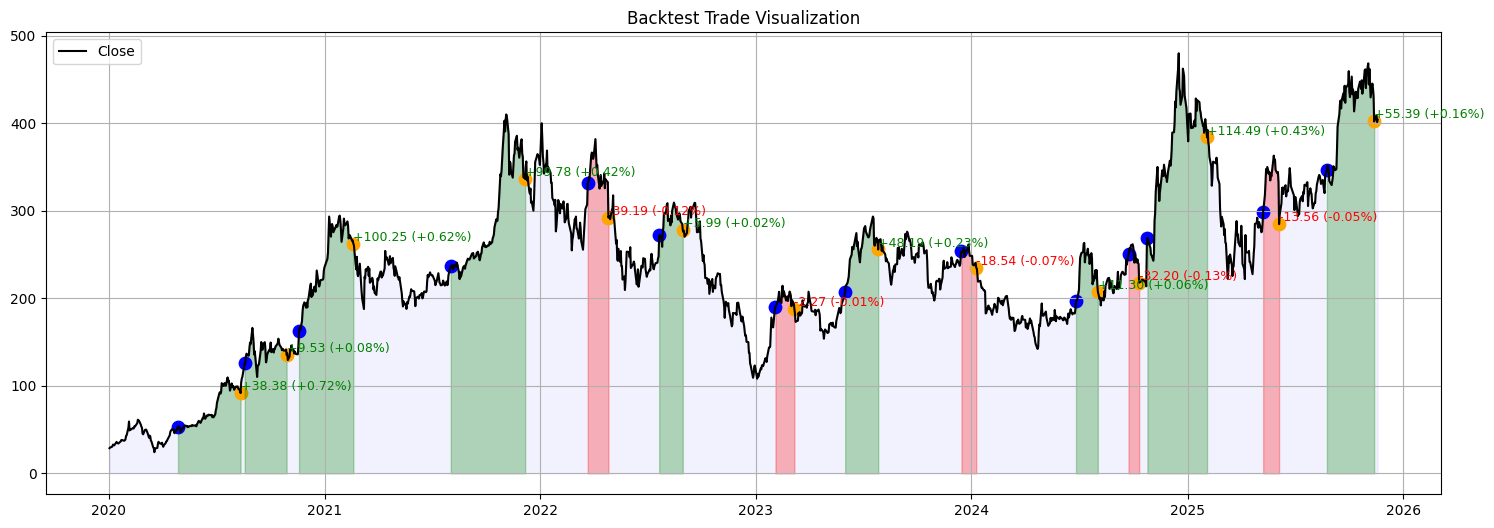

=== 績效指標 ===
策略_總報酬率 : 6.295626038752062
策略_年化報酬率 : 0.4017041149309113
策略_年化波動率 : 0.3916466840980131
策略_Sharpe : 0.8004266443182515
策略_最大回撤 : -0.3800337753338253
策略_交易次數 : 14
基準_總報酬率 : 14.08415806789383
基準_年化報酬率 : 0.5858452187511352
基準_年化波動率 : 0.6678425261306065
基準_Sharpe : 0.6748267431779152
基準_最大回撤 : -0.736322174421913

=== 交易紀錄（前 5 筆） ===
  entry_date  exit_date  entry_price  exit_price  holding_days  return_pct  \
0 2020-04-27 2020-08-11    53.250000   91.625999           106    0.720676   
1 2020-08-18 2020-10-28   125.806000  135.339996            71    0.075783   
2 2020-11-18 2021-02-18   162.213333  262.459991            92    0.617993   
3 2021-08-02 2021-12-06   236.556671  336.336670           126    0.421802   
4 2022-03-22 2022-04-26   331.326660  292.140015            35   -0.118272   

                                          buy_factor  \
0                      BreakoutBuyFactor_{'xd': 42};   
1                      BreakoutBuyFactor_{'xd': 60};   
2                  

<Axes: xlabel='Date'>

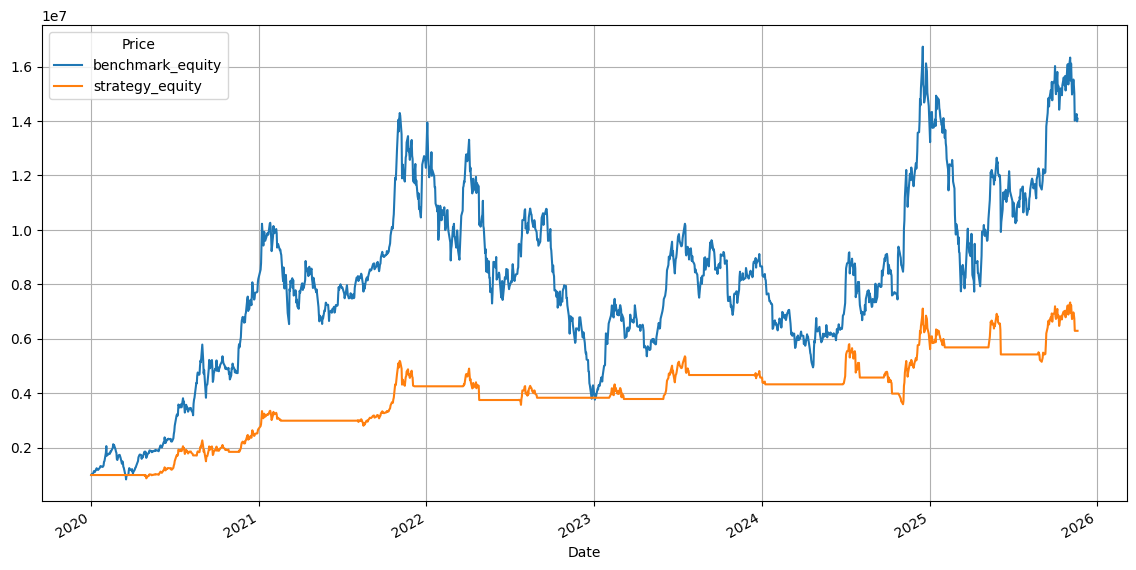

In [3]:
# Test 1 - 用突破因子買入與賣出
# 設定買入因子
buy_factors = [
    {"class": BreakoutBuyFactor, "xd": 60},
    {"class": BreakoutBuyFactor, "xd": 42},
]

# 設定賣出因子
sell_factors = [
    {"class": BreakdownSellFactor, "xd": 120},
    {"class": BreakdownSellFactor, "xd": 20}
]

# 執行單支股票回測
# 參數：
# df: 價格資料，index 為日期，至少包含 'Close'
# buy_factors: 買入因子設定 list
# sell_factors: 賣出因子設定 list
# initial_capital: 初始資金（只用來算 equity，不做分批加減）
# 回傳：
# result_df: 策略報酬率
# trades_df: 交易紀錄
# stats: 績效指標

bt_test1 = Backtester(df, buy_factors=buy_factors, sell_factors=sell_factors, initial_capital=1_000_000)
result_df_test1, trades_df_test1, stats_test1 = bt_test1.run(show_plot=True)

print("=== 績效指標 ===")
for k, v in stats_test1.items():
    print(k, ":", v)

print("\n=== 交易紀錄（前 5 筆） ===")
print(trades_df_test1.head())

# 策略 vs 基準績效曲線
result_df_test1[["benchmark_equity", "strategy_equity"]].plot(figsize=(14, 7), grid=True)

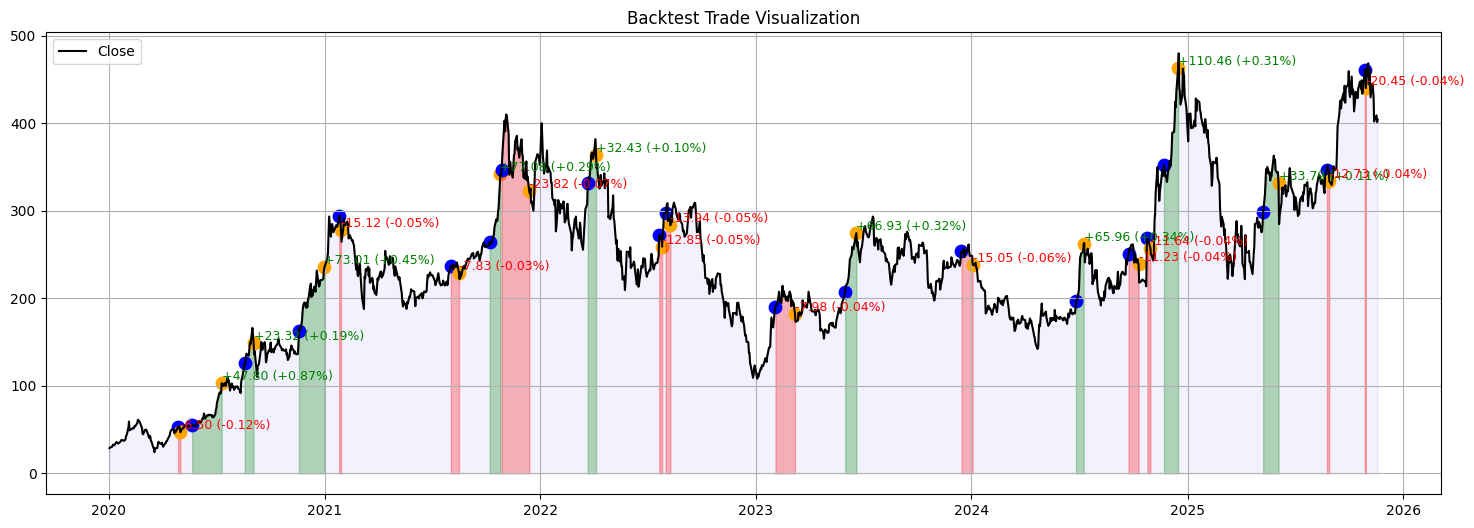

=== 績效指標 ===
策略_總報酬率 : 6.063076434472525
策略_年化報酬率 : 0.3940094705643129
策略_年化波動率 : 0.25263066531936446
策略_Sharpe : 1.215495802388105
策略_最大回撤 : -0.24958127842484512
策略_交易次數 : 21
基準_總報酬率 : 14.08415806789383
基準_年化報酬率 : 0.5858452187511352
基準_年化波動率 : 0.6678425261306065
基準_Sharpe : 0.6748267431779152
基準_最大回撤 : -0.736322174421913

=== 交易紀錄（前 5 筆） ===
  entry_date  exit_date  entry_price  exit_price  holding_days  return_pct  \
0 2020-04-27 2020-05-01    53.250000   46.754665             4   -0.121978   
1 2020-05-21 2020-07-10    55.173332  102.976669            50    0.866421   
2 2020-08-18 2020-09-02   125.806000  149.123337            15    0.185344   
3 2020-11-18 2020-12-31   162.213333  235.223328            43    0.450086   
4 2021-01-25 2021-01-28   293.600006  278.476654             3   -0.051510   

                      buy_factor  \
0  BreakoutBuyFactor_{'xd': 42};   
1  BreakoutBuyFactor_{'xd': 60};   
2  BreakoutBuyFactor_{'xd': 60};   
3  BreakoutBuyFactor_{'xd': 42};   
4  Bre

<Axes: xlabel='Date'>

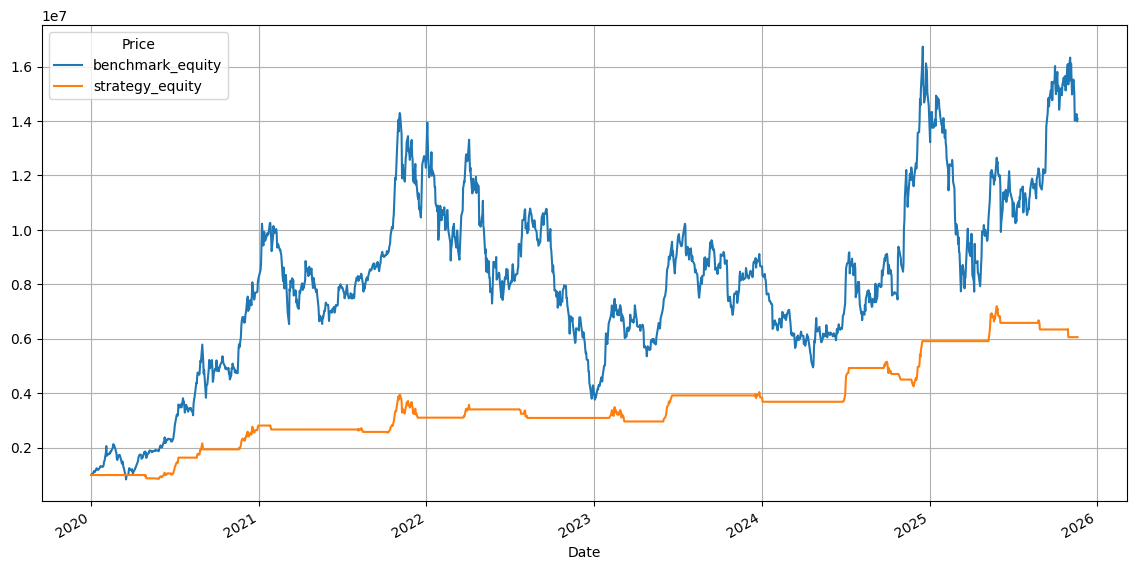

In [4]:
# Test 2 - 加入Atr因子來當作止盈止損條件
# 加入 AtrStopSellFactor 來當作止盈止損賣出因子
buy_factors = [
    {"class": BreakoutBuyFactor, "xd": 60},
    {"class": BreakoutBuyFactor, "xd": 42},
]

# 先前的賣出因子調整
sell_factors = [
    {"class": BreakdownSellFactor, "xd": 120},
    # 加上ATR止盈止損
    {"class": AtrStopSellFactor, "stop_loss_n": 0.5, "stop_win_n": 3.0}
]

bt_test2 = Backtester(df, buy_factors=buy_factors, sell_factors=sell_factors, initial_capital=1_000_000)
result_df_test2, trades_df_test2, stats_test2 = bt_test2.run(show_plot=True)

print("=== 績效指標 ===")
for k, v in stats_test2.items():
    print(k, ":", v)

print("\n=== 交易紀錄（前 5 筆） ===")
print(trades_df_test2.head())

# 策略 vs 基準績效曲線
result_df_test2[["benchmark_equity", "strategy_equity"]].plot(figsize=(14, 7), grid=True)


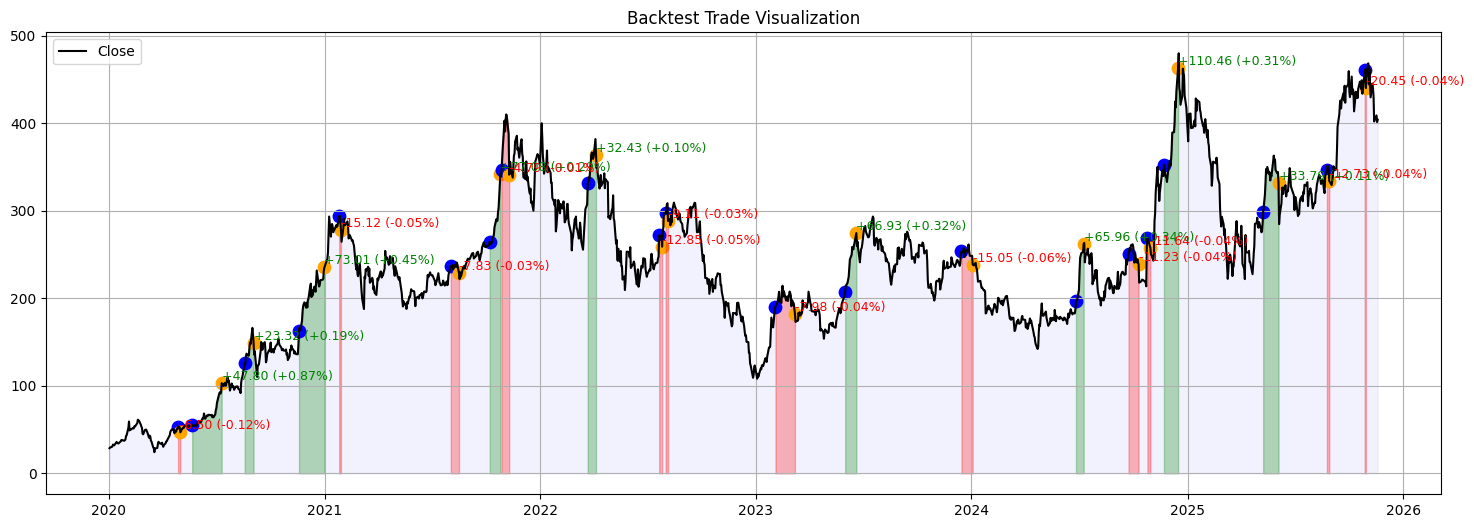

=== 績效指標 ===
策略_總報酬率 : 6.063076434472525
策略_年化報酬率 : 0.3940094705643129
策略_年化波動率 : 0.25263066531936446
策略_Sharpe : 1.215495802388105
策略_最大回撤 : -0.24958127842484512
策略_交易次數 : 21
基準_總報酬率 : 14.08415806789383
基準_年化報酬率 : 0.5858452187511352
基準_年化波動率 : 0.6678425261306065
基準_Sharpe : 0.6748267431779152
基準_最大回撤 : -0.736322174421913

=== 交易紀錄（前 5 筆） ===
  entry_date  exit_date  entry_price  exit_price  holding_days  return_pct  \
0 2020-04-27 2020-05-01    53.250000   46.754665             4   -0.121978   
1 2020-05-21 2020-07-10    55.173332  102.976669            50    0.866421   
2 2020-08-18 2020-09-02   125.806000  149.123337            15    0.185344   
3 2020-11-18 2020-12-31   162.213333  235.223328            43    0.450086   
4 2021-01-25 2021-01-28   293.600006  278.476654             3   -0.051510   

                      buy_factor  \
0  BreakoutBuyFactor_{'xd': 42};   
1  BreakoutBuyFactor_{'xd': 60};   
2  BreakoutBuyFactor_{'xd': 60};   
3  BreakoutBuyFactor_{'xd': 42};   
4  Bre

<Axes: xlabel='Date'>

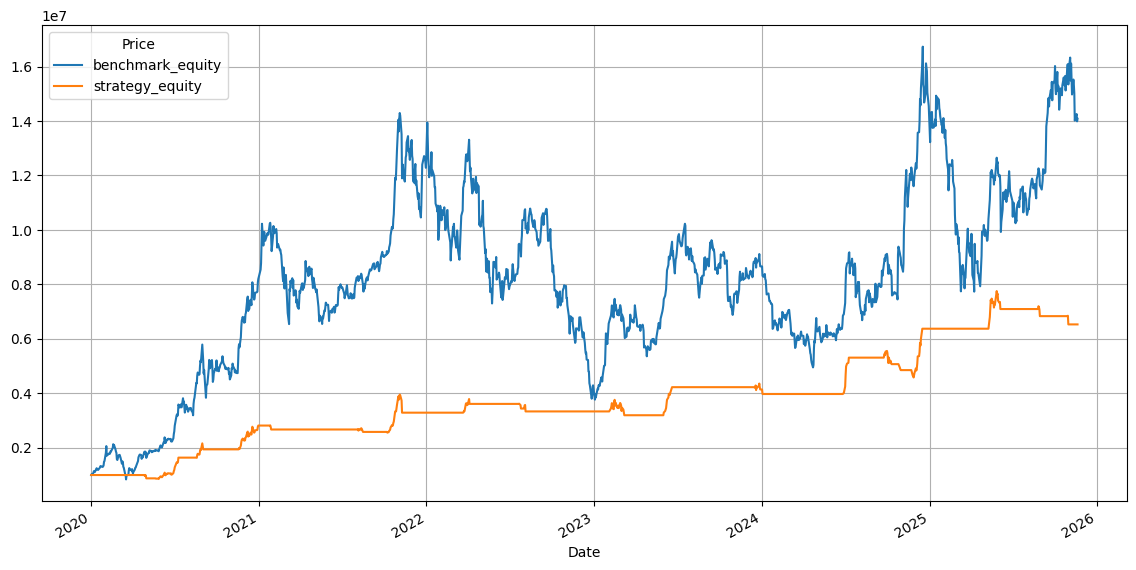

In [47]:
# Test 3 - 股價大量下跌時強制賣出
# 加入止損策略
buy_factors = [
    {"class": BreakoutBuyFactor, "xd": 60},
    {"class": BreakoutBuyFactor, "xd": 42},
]

# 先前的賣出因子調整
sell_factors = [
    {"class": BreakdownSellFactor, "xd": 120},
    # 加上ATR止盈止損
    {"class": AtrStopSellFactor, "stop_loss_n": 0.5, "stop_win_n": 3.0},
    # 加入風險控制策略
    {"class": RiskStopSellFactor, "pre_atr_n": 1.5}
]

bt_test3 = Backtester(df, buy_factors=buy_factors, sell_factors=sell_factors, initial_capital=1_000_000)
result_df_test3, trades_df_test3, stats_test3 = bt_test3.run(show_plot=True)

print("=== 績效指標 ===")
for k, v in stats_test2.items():
    print(k, ":", v)

print("\n=== 交易紀錄（前 5 筆） ===")
print(trades_df_test3.head())

# 策略 vs 基準績效曲線
result_df_test3[["benchmark_equity", "strategy_equity"]].plot(figsize=(14, 7), grid=True)

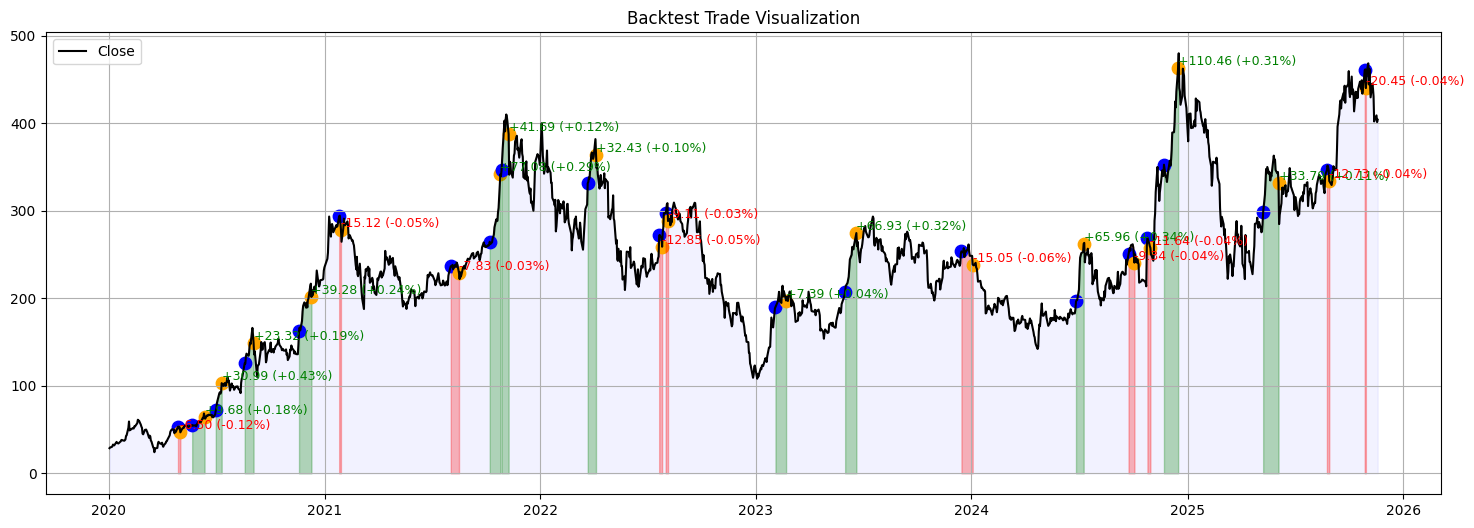

=== 績效指標 ===
策略_總報酬率 : 6.2596249702868665
策略_年化報酬率 : 0.40052634899695727
策略_年化波動率 : 0.21879665621591
策略_Sharpe : 1.4283002026851912
策略_最大回撤 : -0.16902738696124686
策略_交易次數 : 22
基準_總報酬率 : 14.08415806789383
基準_年化報酬率 : 0.5858452187511352
基準_年化波動率 : 0.6678425261306065
基準_Sharpe : 0.6748267431779152
基準_最大回撤 : -0.736322174421913

=== 交易紀錄（前 5 筆） ===
  entry_date  exit_date  entry_price  exit_price  holding_days  return_pct  \
0 2020-04-27 2020-05-01    53.250000   46.754665             4   -0.121978   
1 2020-05-21 2020-06-11    55.173332   64.856003            21    0.175495   
2 2020-06-30 2020-07-10    71.987335  102.976669            10    0.430483   
3 2020-08-18 2020-09-02   125.806000  149.123337            15    0.185344   
4 2020-11-18 2020-12-09   162.213333  201.493332            21    0.242150   

                      buy_factor  \
0  BreakoutBuyFactor_{'xd': 42};   
1  BreakoutBuyFactor_{'xd': 60};   
2  BreakoutBuyFactor_{'xd': 42};   
3  BreakoutBuyFactor_{'xd': 60};   
4  Bre

<Axes: xlabel='Date'>

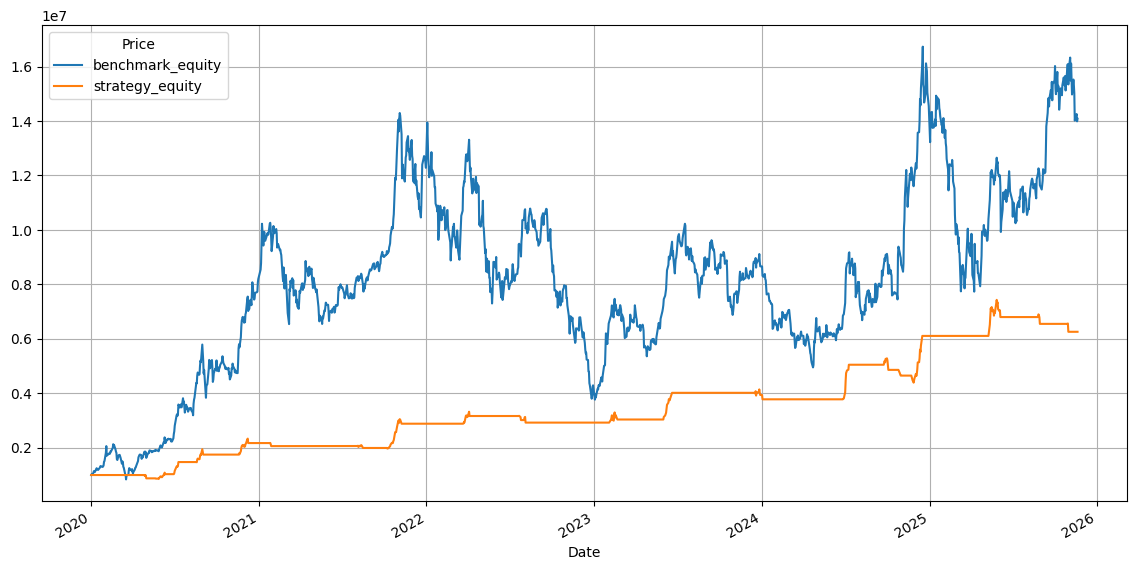

In [5]:
# Test 4 - 加入保護性止盈策略試試
# 加入保護性止盈策略
buy_factors = [
    {"class": BreakoutBuyFactor, "xd": 60},
    {"class": BreakoutBuyFactor, "xd": 42},
]

# 先前的賣出因子調整
sell_factors = [
    {"class": BreakdownSellFactor, "xd": 120},
    # 加上ATR止盈止損
    {"class": AtrStopSellFactor, "stop_loss_n": 0.5, "stop_win_n": 3.0},
    # 加入風險控制策略
    {"class": RiskStopSellFactor, "pre_atr_n": 1.5},
    # 加入保護性止盈策略
    {"class": CloseAtrStopSellFactor, "close_atr_n": 1.2}
]

bt_test4 = Backtester(df, buy_factors=buy_factors, sell_factors=sell_factors, initial_capital=1_000_000)
result_df_test4, trades_df_test4, stats_test4 = bt_test4.run(show_plot=True)

print("=== 績效指標 ===")
for k, v in stats_test4.items():
    print(k, ":", v)

print("\n=== 交易紀錄（前 5 筆） ===")
print(trades_df_test4.head())

# 策略 vs 基準績效曲線
result_df_test4[["benchmark_equity", "strategy_equity"]].plot(figsize=(14, 7), grid=True)

In [49]:
# 8.1.3節內容：滑點買入與賣出價格確立及策略實現

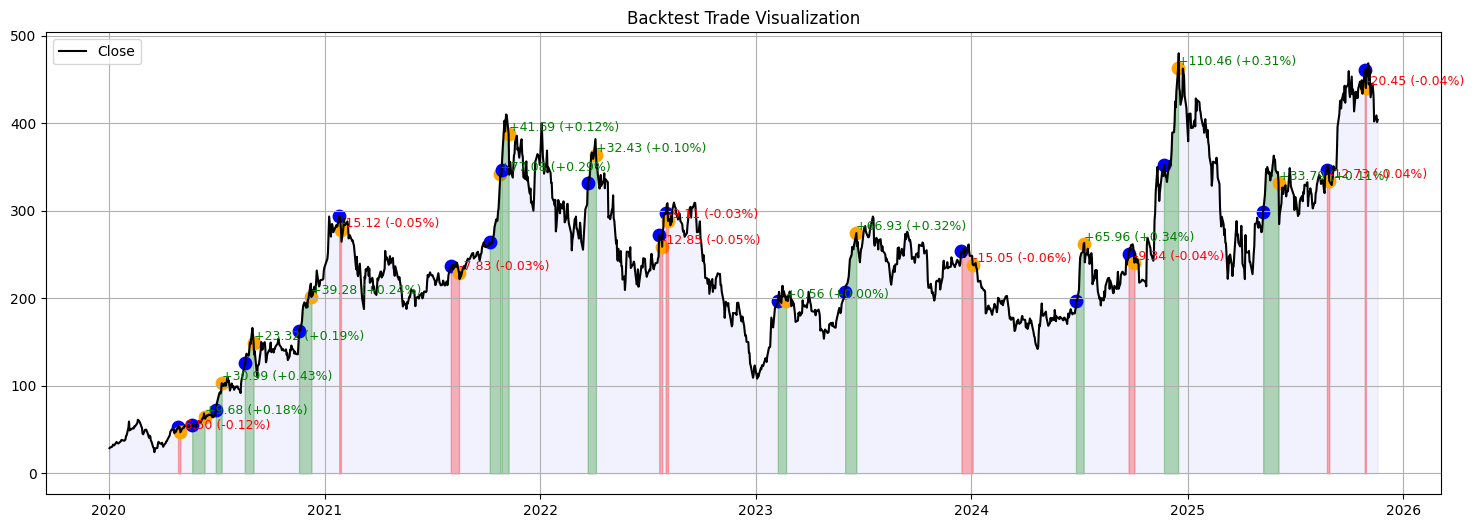

=== 績效指標 ===
策略_總報酬率 : 6.315480880868844
策略_年化報酬率 : 0.4023515985783206
策略_年化波動率 : 0.218184103614836
策略_Sharpe : 1.4392476060288617
策略_最大回撤 : -0.15772894819624694
策略_交易次數 : 21
基準_總報酬率 : 14.08415806789383
基準_年化報酬率 : 0.5858452187511352
基準_年化波動率 : 0.6678425261306065
基準_Sharpe : 0.6748267431779152
基準_最大回撤 : -0.736322174421913

=== 交易紀錄（前 5 筆） ===
  entry_date  exit_date  entry_price  exit_price  holding_days  return_pct  \
0 2020-04-27 2020-05-01    53.250000   46.754665             4   -0.121978   
1 2020-05-21 2020-06-11    55.173332   64.856003            21    0.175495   
2 2020-06-30 2020-07-10    71.987335  102.976669            10    0.430483   
3 2020-08-18 2020-09-02   125.806000  149.123337            15    0.185344   
4 2020-11-18 2020-12-09   162.213333  201.493332            21    0.242150   

                      buy_factor  \
0  BreakoutBuyFactor_{'xd': 42};   
1  BreakoutBuyFactor_{'xd': 60};   
2  BreakoutBuyFactor_{'xd': 42};   
3  BreakoutBuyFactor_{'xd': 60};   
4  Brea

<Axes: xlabel='Date'>

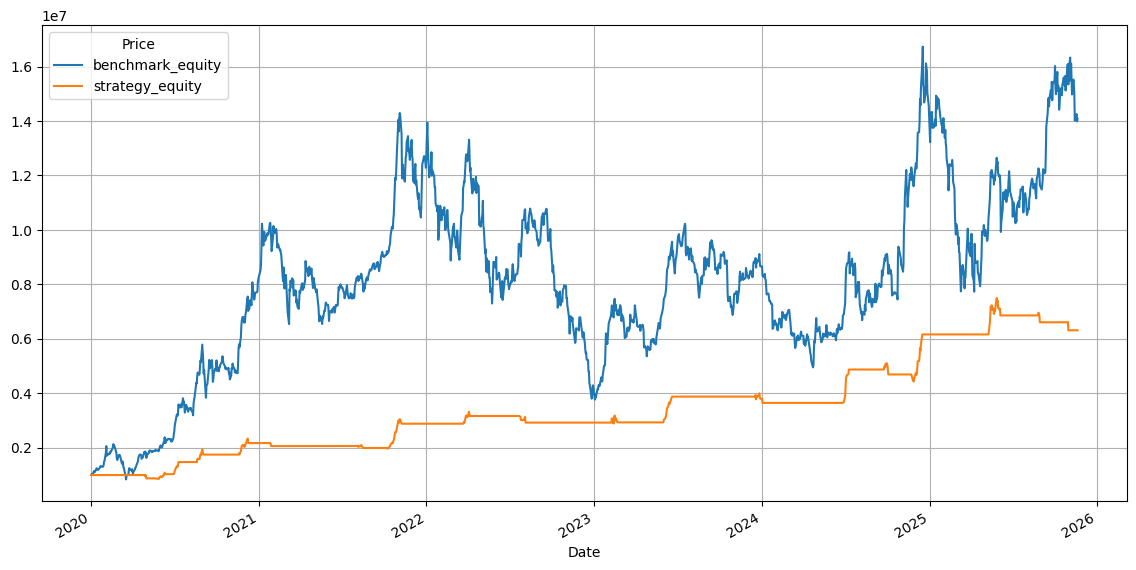

In [50]:
# Test 5 - 滑點買入
buy_factors = [
    {"class": BreakoutBuyFactor, "xd": 60},
    {"class": BreakoutBuyFactor, "xd": 42},
]

# 先前的賣出因子調整
sell_factors = [
    {"class": BreakdownSellFactor, "xd": 120},
    # 加上ATR止盈止損
    {"class": AtrStopSellFactor, "stop_loss_n": 0.5, "stop_win_n": 3.0},
    # 加入風險控制策略
    {"class": RiskStopSellFactor, "pre_atr_n": 1.5},
    # 加入保護性止盈策略
    {"class": CloseAtrStopSellFactor, "close_atr_n": 1.2}
]

# 滑點買入帶入
slippage_factors = [
    {"class": SlippageOpenGap, "open_down_rate": 0.01, "action": "buy"}
]

bt_test5 = Backtester(df, buy_factors=buy_factors, sell_factors=sell_factors, initial_capital=1_000_000, slippage_factors=slippage_factors)
result_df_test5, trades_df_test5, stats_test5, canceled_trades_df_test5 = bt_test5.run(show_plot=True)

print("=== 績效指標 ===")
for k, v in stats_test5.items():
    print(k, ":", v)

print("\n=== 交易紀錄（前 5 筆） ===")
print(trades_df_test5.head())

# 策略 vs 基準績效曲線
result_df_test5[["benchmark_equity", "strategy_equity"]].plot(figsize=(14, 7), grid=True)